# CELESTIAL STELLAR CLASSIFICATION 

# Notam Kedari - 8145461

This notebook is regarding the classification of observations of space to be either stars, galaxies or quasars(QFO). We will carry out a cycle of data analysis including the necessary steps and buliding machine learning model to predict new data precise accuracy and better results.

In [1]:
#Importing Necessary Libraries
import os
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

# 1. LOADING THE DATASET

# Data Acquisition

We have used data from 'Sloan Digital Sky Surface' dataset which offers public data of space observations.

In [3]:
data = pd.read_csv('Dataset.csv')

In [4]:
#Top Entries Of the Dataset
data.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237660e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543780e+18,GALAXY,0.634794,5812,56354,171
1,1.237660e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176010e+19,GALAXY,0.779136,10445,58158,427
2,1.237660e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237660e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030110e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891860e+18,GALAXY,0.116123,6121,56187,842


In [5]:
#Bottom Entries of the Dataset
data.tail()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
99995,1.237680e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.060000e+19,GALAXY,0.000000,9374,57749,438
99996,1.237680e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586350e+18,GALAXY,0.404895,7626,56934,866
99997,1.237670e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112010e+18,GALAXY,0.143366,2764,54535,74
99998,1.237660e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470
99999,1.237660e+18,196.896053,49.464643,22.62171,21.79745,20.60115,20.00959,19.28075,3650,301,4,60,8.343150e+18,GALAXY,0.542944,7410,57104,851


In [6]:
#Dimensions of the Dataset
data.shape

(100000, 18)

In [7]:
data.size

1800000

The dataset consists of 100,000 observations. 

In [8]:
data.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237688e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783893e+18,0.576661,5137.009660,55588.647500,449.312740
std,2.311624e+14,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324026e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237650e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995190e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237660e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844140e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237660e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614885e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237670e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332142e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.240000e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412690e+19,7.011245,12547.000000,58932.000000,1000.000000


In [9]:
data.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

Every data point is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy, or quasar(QFO).


# Data Preprocessing and Exploratory Data Analysis

In [10]:
kn = data.dropna()

In [11]:
kn = kn.drop_duplicates()

In [12]:
kn.shape

(100000, 18)

In [13]:
kn.isnull()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
99996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
99997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
99998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
kn.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [15]:
kn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [16]:
#Renaming the feature labels for Better Representation
kn = kn.rename({'u':'UltraVioletFilter','g':'GreenFilter','r':'RedFilter','i':'NearInfraFilter','z':'InfraFilter'},axis=1)

The above attributes refer to the different optical filters at different wavelengths which are used to capture the observations.

In [17]:
kn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   obj_ID             100000 non-null  float64
 1   alpha              100000 non-null  float64
 2   delta              100000 non-null  float64
 3   UltraVioletFilter  100000 non-null  float64
 4   GreenFilter        100000 non-null  float64
 5   RedFilter          100000 non-null  float64
 6   NearInfraFilter    100000 non-null  float64
 7   InfraFilter        100000 non-null  float64
 8   run_ID             100000 non-null  int64  
 9   rerun_ID           100000 non-null  int64  
 10  cam_col            100000 non-null  int64  
 11  field_ID           100000 non-null  int64  
 12  spec_obj_ID        100000 non-null  float64
 13  class              100000 non-null  object 
 14  redshift           100000 non-null  float64
 15  plate              100000 non-null  int64  
 16  MJD

In [18]:
kn['alpha'].unique()

array([135.6891066, 144.8261006, 142.1887896, ..., 224.5874074,
       212.2686211, 196.896053 ])

In [19]:
kn['delta'].unique()

array([32.49463184, 31.27418489, 35.58244418, ..., 15.70070739,
       46.66036528, 49.46464277])

In [20]:
kn.head(10)

,obj_ID,alpha,delta,UltraVioletFilter,GreenFilter,RedFilter,NearInfraFilter,InfraFilter,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237660e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543780e+18,GALAXY,0.634794,5812,56354,171
1,1.237660e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176010e+19,GALAXY,0.779136,10445,58158,427
2,1.237660e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237660e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030110e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891860e+18,GALAXY,0.116123,6121,56187,842
5,1.237680e+18,340.995120,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,8102,301,3,110,5.658980e+18,QSO,1.424659,5026,55855,741
6,1.237680e+18,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,7773,301,2,462,1.250000e+19,QSO,0.586455,11069,58456,113
7,1.237680e+18,5.433176,12.065186,22.24979,22.02172,20.34126,19.48794,18.84999,7773,301,2,346,6.961440e+18,GALAXY,0.477009,6183,56210,15
8,1.237660e+18,200.290475,47.199402,24.40286,22.35669,20.61032,19.46490,18.95852,3716,301,5,108,7.459280e+18,GALAXY,0.660012,6625,56386,719
9,1.237670e+18,39.149691,28.102842,21.74669,20.03493,19.17553,18.81823,18.65422,5934,301,4,122,2.751760e+18,STAR,-0.000008,2444,54082,232


In [21]:
kn.tail(10)

,obj_ID,alpha,delta,UltraVioletFilter,GreenFilter,RedFilter,NearInfraFilter,InfraFilter,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
99990,1.237670e+18,143.414774,26.731108,23.79655,22.41332,20.36012,19.33964,18.74413,4569,301,1,213,6.525780e+18,GALAXY,0.555789,5796,56274,247
99991,1.237670e+18,146.898055,27.818094,26.22899,21.84820,20.47138,19.60049,18.94726,4569,301,1,234,6.523610e+18,GALAXY,0.550025,5794,56282,535
99992,1.237670e+18,129.862762,14.574312,25.82234,24.02722,21.43137,20.13085,19.66464,5137,301,3,111,5.066770e+18,GALAXY,0.587944,4500,55543,819
99993,1.237650e+18,0.740551,-9.184243,23.13172,23.18506,21.52854,20.26975,20.11383,1740,301,5,27,8.069570e+18,GALAXY,0.617036,7167,56604,889
99994,1.237660e+18,317.246996,-0.682254,20.96526,19.81625,19.34186,19.14711,19.05790,4187,301,2,64,1.154060e+18,GALAXY,0.175206,1025,53239,51
99995,1.237680e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.060000e+19,GALAXY,0.000000,9374,57749,438
99996,1.237680e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586350e+18,GALAXY,0.404895,7626,56934,866
99997,1.237670e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112010e+18,GALAXY,0.143366,2764,54535,74
99998,1.237660e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470
99999,1.237660e+18,196.896053,49.464643,22.62171,21.79745,20.60115,20.00959,19.28075,3650,301,4,60,8.343150e+18,GALAXY,0.542944,7410,57104,851


# 2.  STATISTICAL CHARACTERESTICS OF DATASET

In [22]:
kn.describe()

,obj_ID,alpha,delta,UltraVioletFilter,GreenFilter,RedFilter,NearInfraFilter,InfraFilter,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237688e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783893e+18,0.576661,5137.009660,55588.647500,449.312740
std,2.311624e+14,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324026e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237650e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995190e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237660e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844140e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237660e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614885e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237670e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332142e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.240000e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412690e+19,7.011245,12547.000000,58932.000000,1000.000000


In [23]:
sum(kn.duplicated())

0

In [24]:
kn.corr()

,obj_ID,alpha,delta,UltraVioletFilter,GreenFilter,RedFilter,NearInfraFilter,InfraFilter,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
obj_ID,1.000000,-0.000401,-0.013086,0.000887,0.000757,0.002709,0.003529,0.000610,0.035830,NaN,-0.005763,0.000302,0.005225,-0.004434,0.005225,0.006079,0.003208
alpha,-0.000401,1.000000,0.138691,-0.001532,-0.002423,-0.022083,-0.023580,-0.002918,-0.013737,NaN,0.019582,-0.165577,-0.002558,0.001667,-0.002554,0.019943,0.030464
delta,-0.013086,0.138691,1.000000,0.002074,0.003523,-0.006835,-0.004480,0.003630,-0.301238,NaN,0.032565,-0.173416,0.112324,0.031638,0.112329,0.107333,0.028250
UltraVioletFilter,0.000887,-0.001532,0.002074,1.000000,0.999311,0.054149,0.045730,0.998093,0.015309,NaN,0.003548,-0.008374,0.029997,0.014309,0.029997,0.031997,0.016305
GreenFilter,0.000757,-0.002423,0.003523,0.999311,1.000000,0.062387,0.056271,0.999161,0.015710,NaN,0.003508,-0.008852,0.039444,0.022954,0.039443,0.040274,0.017470
RedFilter,0.002709,-0.022083,-0.006835,0.054149,0.062387,1.000000,0.962868,0.053677,0.153889,NaN,0.008480,-0.026423,0.655254,0.433241,0.655243,0.671180,0.223106
NearInfraFilter,0.003529,-0.023580,-0.004480,0.045730,0.056271,0.962868,1.000000,0.055994,0.147668,NaN,0.007615,-0.026679,0.661651,0.492383,0.661640,0.672523,0.214787
InfraFilter,0.000610,-0.002918,0.003630,0.998093,0.999161,0.053677,0.055994,1.000000,0.013811,NaN,0.003365,-0.008903,0.037813,0.030380,0.037813,0.037469,0.014668
run_ID,0.035830,-0.013737,-0.301238,0.015309,0.015710,0.153889,0.147668,0.013811,1.000000,NaN,-0.047098,0.031498,0.239453,0.065400,0.239459,0.262687,0.067165
rerun_ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
kn['class'].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

# 3. DATA VISUALIZATION

In [26]:
#importing required libraries
import matplotlib.pyplot as plt
import seaborn as sns

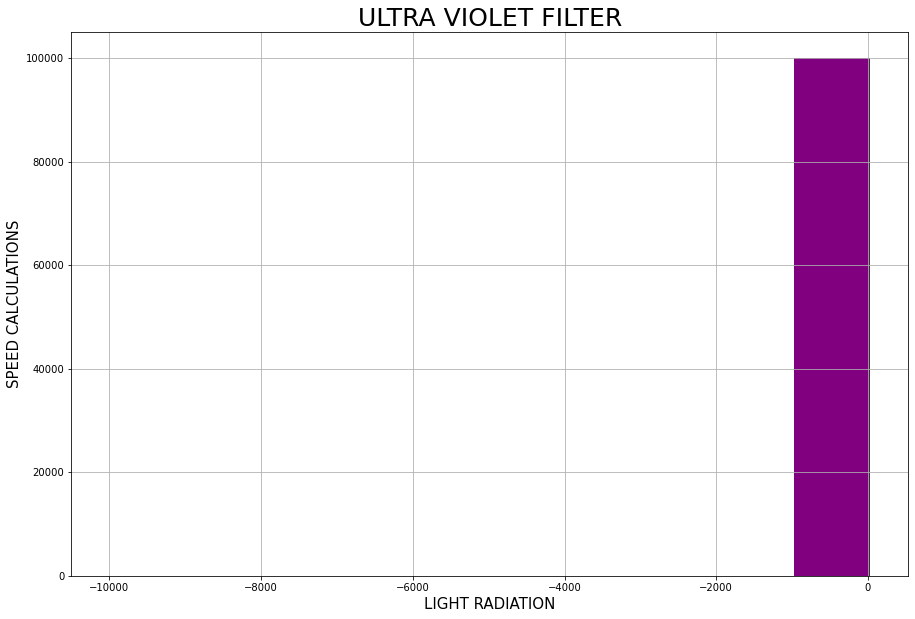

In [27]:
kn["UltraVioletFilter"].hist(figsize=(15,10), color = 'purple')
#Title Of the Graph
plt.title("ULTRA VIOLET FILTER", size=25)
#X Axis Attribute
plt.xlabel("LIGHT RADIATION", size=15)
#Y Axis Attribute
plt.ylabel("SPEED CALCULATIONS", size=15)
plt.show()

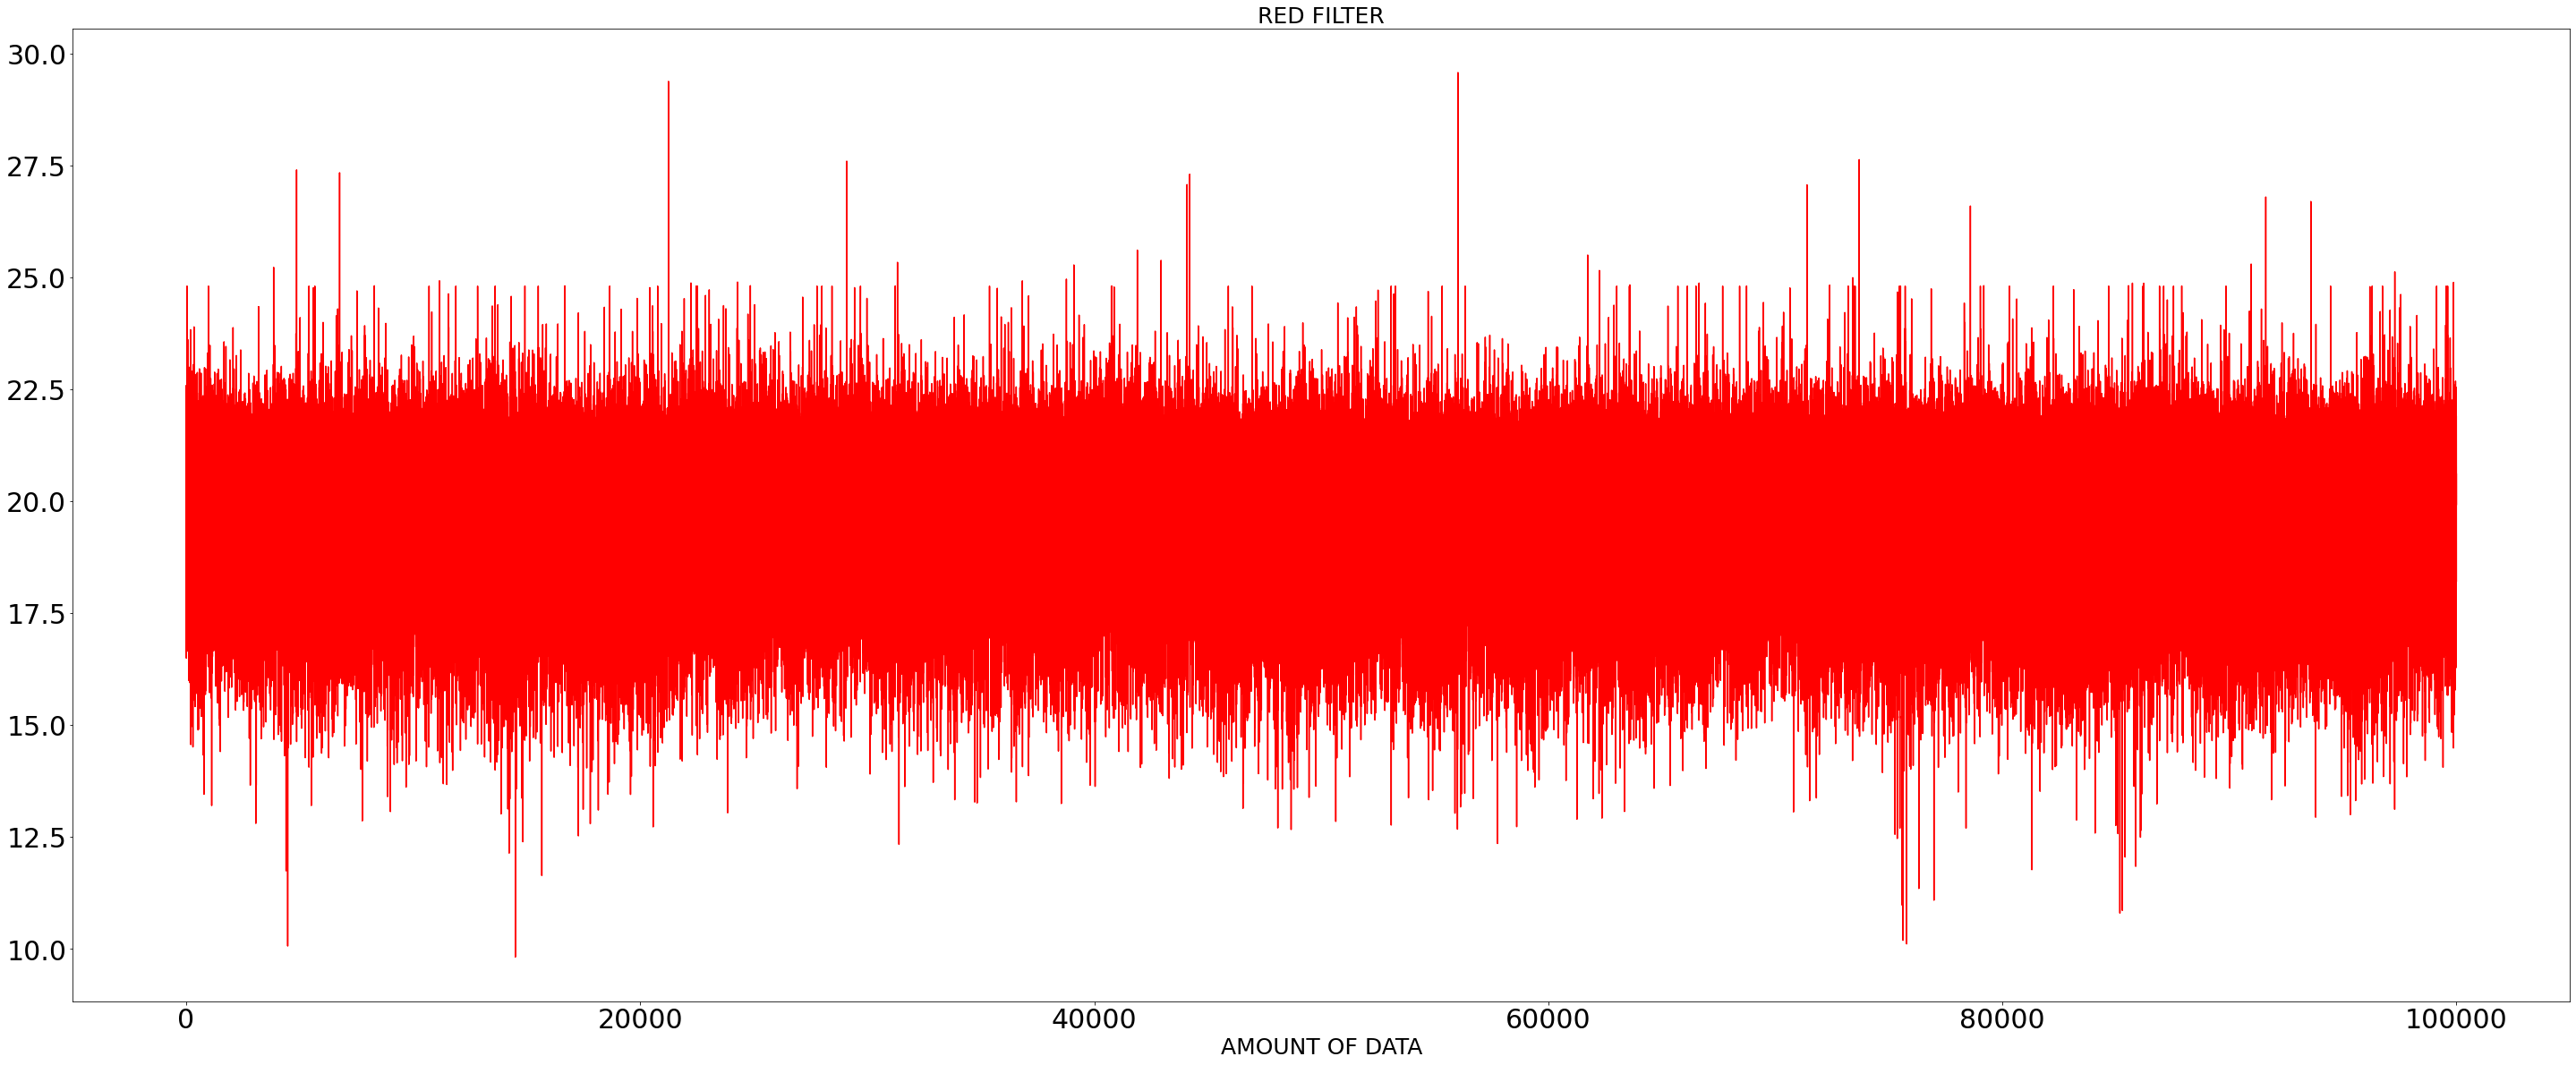

In [28]:
kn["RedFilter"].plot(figsize=(50,20), color='red',fontsize='30')
plt.title('RED FILTER', size = 25)
plt.xlabel("AMOUNT OF DATA", size=25)
plt.show()

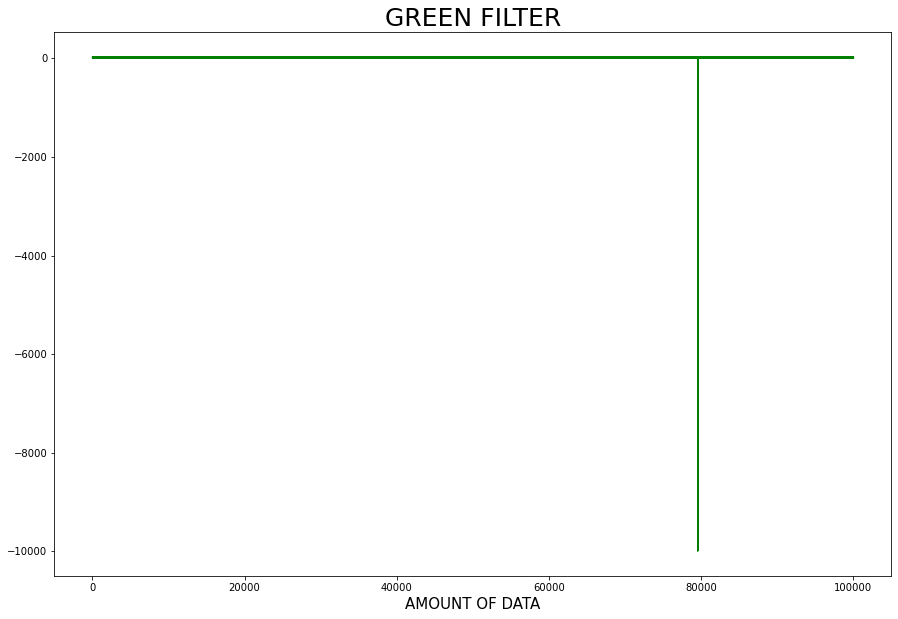

In [29]:
kn["GreenFilter"].plot(figsize=(15,10), color='green')
plt.title('GREEN FILTER', size = 25)
plt.xlabel("AMOUNT OF DATA", size=15)
plt.show()

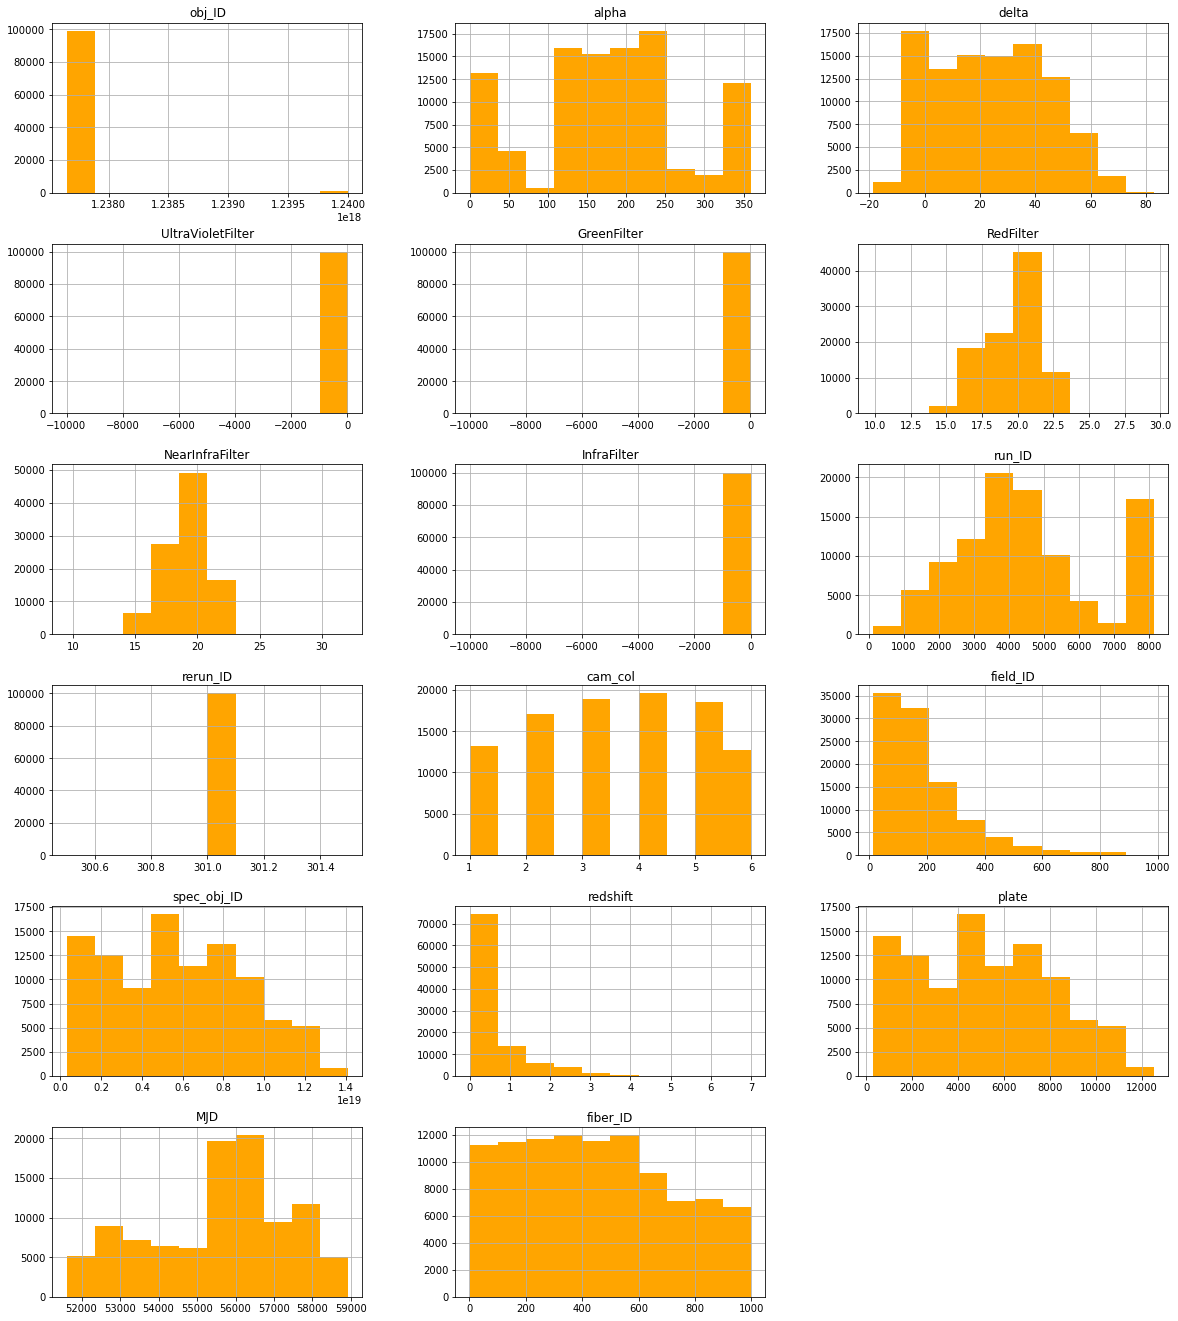

In [30]:
#Histogram plot
kn.hist(figsize=(20,60), color='orange', layout=(15,3))
plt.show()

Box Plot:


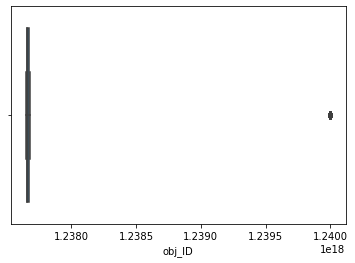

Box Plot:


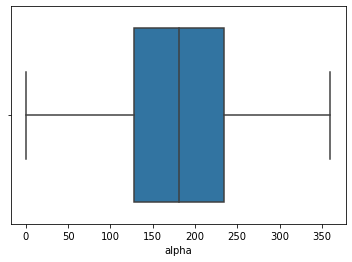

Box Plot:


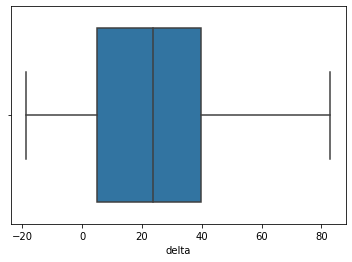

Box Plot:


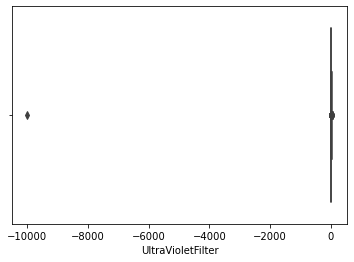

Box Plot:


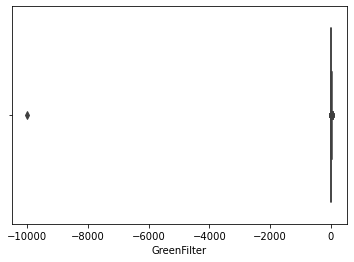

Box Plot:


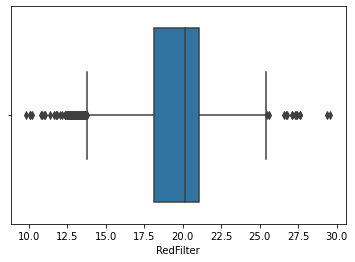

Box Plot:


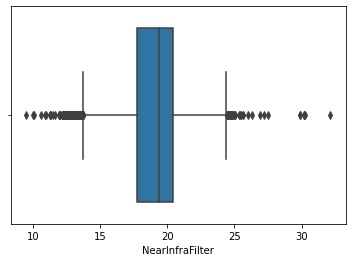

Box Plot:


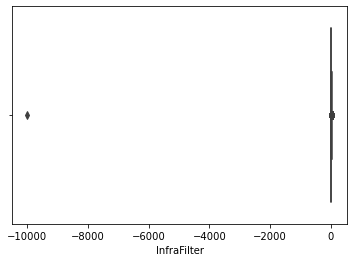

Box Plot:


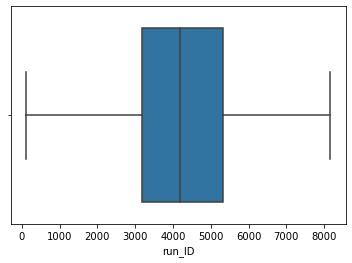

Box Plot:


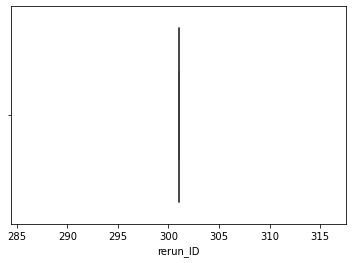

Box Plot:


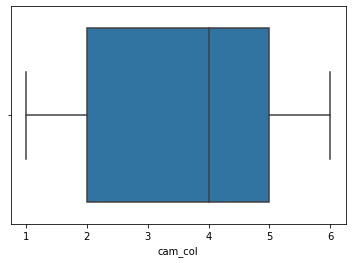

Box Plot:


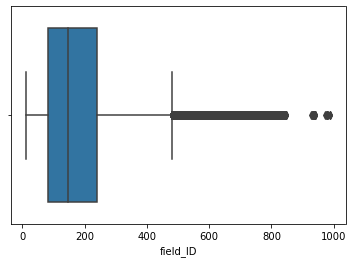

Box Plot:


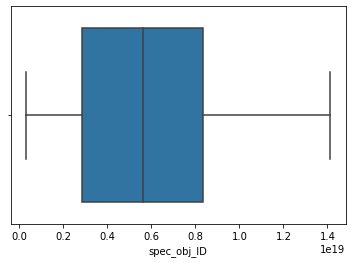

Box Plot:


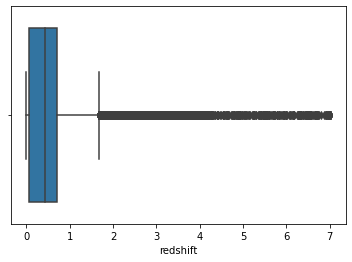

Box Plot:


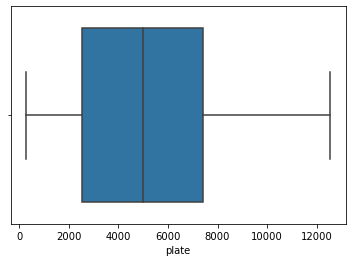

Box Plot:


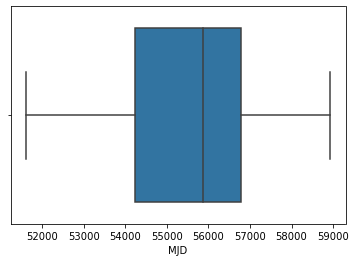

Box Plot:


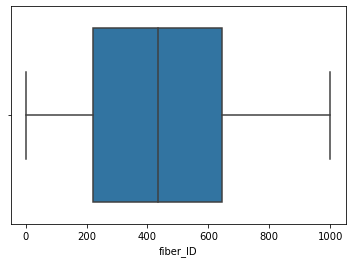

In [31]:
#Box Plot
for col in kn.columns:
    if col not in ['class']:
        print("Box Plot:")
        sns.boxplot(kn[col])
        plt.show()

<AxesSubplot:xlabel='NearInfraFilter', ylabel='RedFilter'>

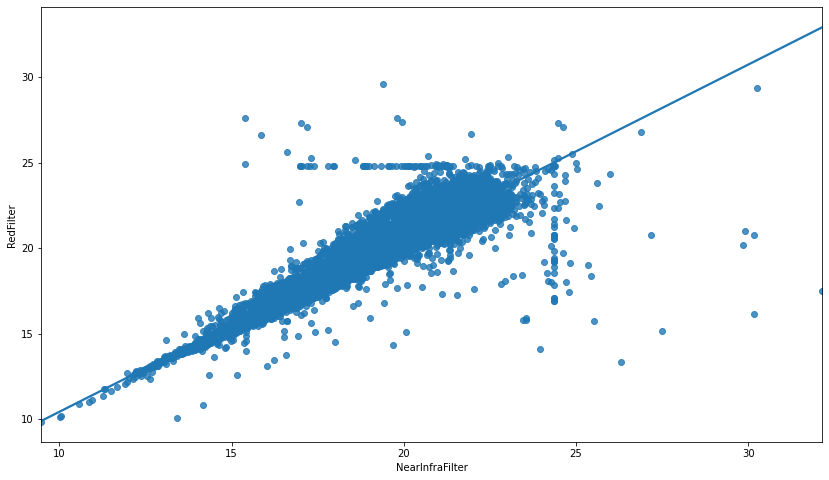

In [32]:
#Scatter Plot
plt.figure(figsize=(14,8))
sns.regplot(kn.NearInfraFilter,kn.RedFilter)

CLASS PROPORTION

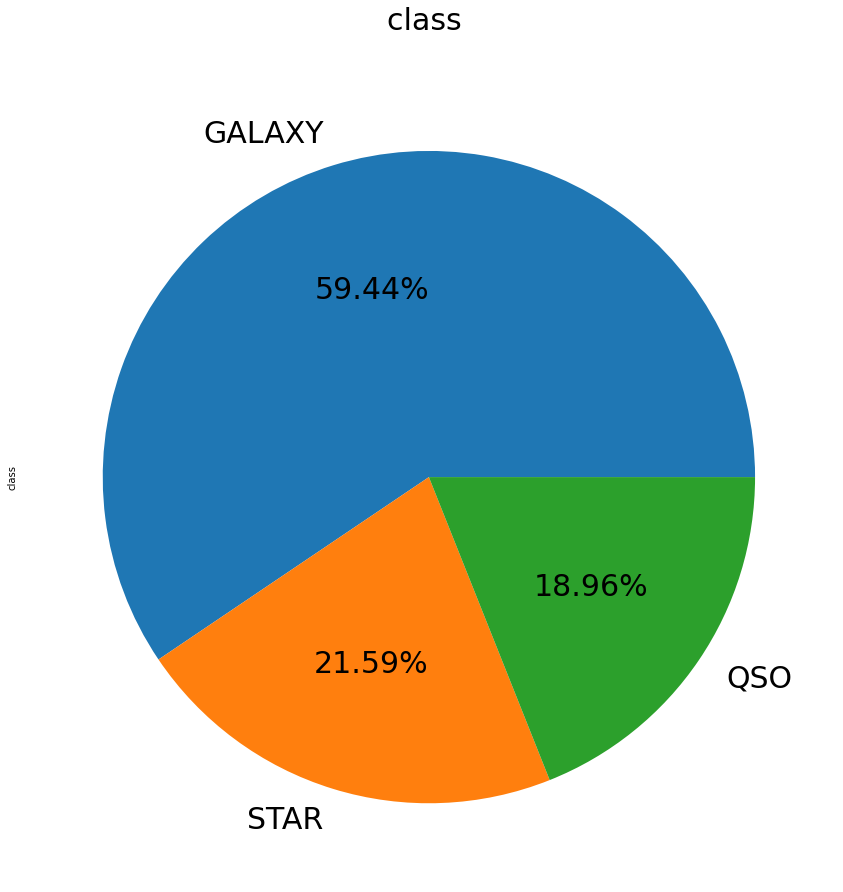

In [33]:
#Depicting the data in the form of Pie Chart
def Contract(kn, variable):
    dataframe_pie = kn[variable].value_counts()
    ax = dataframe_pie.plot.pie(figsize=(15,15), autopct='%1.2f%%', fontsize = 30)
    ax.set_title(variable + ' \n', fontsize = 30)
    
Contract(kn, 'class')

CLASS DISTRIBUTION

<AxesSubplot:xlabel='class', ylabel='count'>

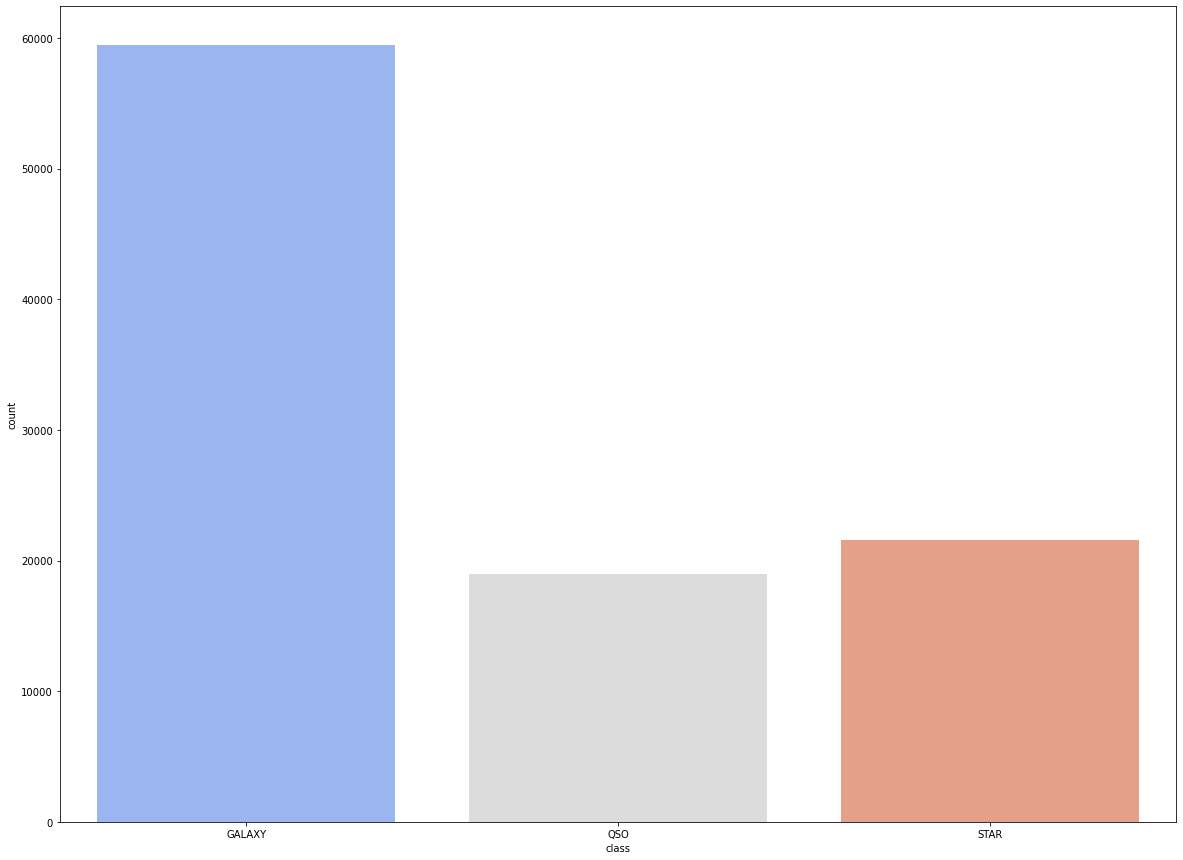

In [34]:
#Depiction Of Data in the form of Bar Chart
plt.figure(figsize=(20,15))
sns.countplot(kn['class'], palette='coolwarm')

# Multivariate Analysis

<AxesSubplot:>

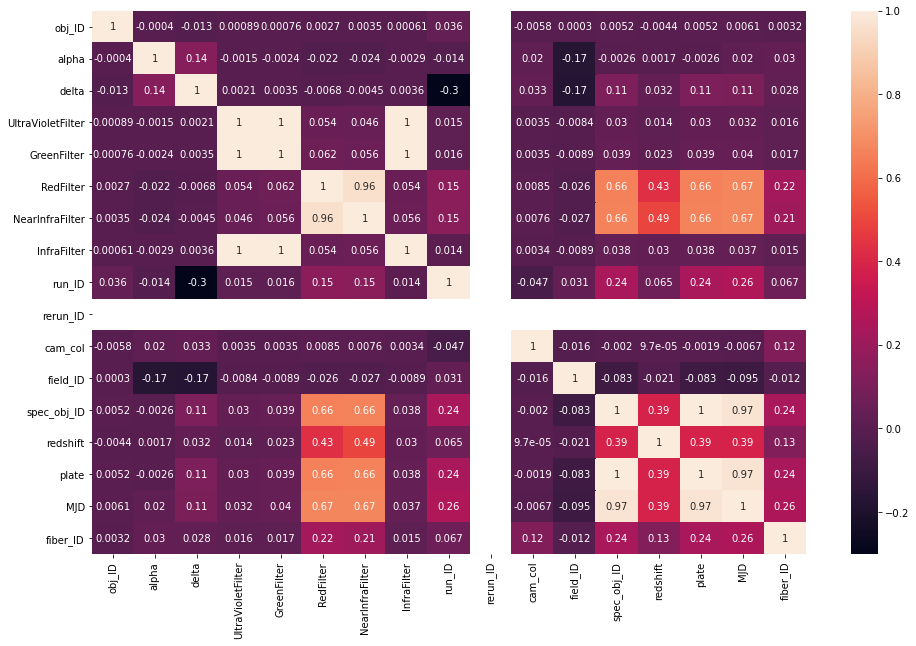

In [35]:
#Feature Heatmap Plot

#Setting up the matplotlib figure
fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(kn.corr(), ax=ax, annot=True)

From the above graph, we could infer that the data comprises 59.44% of Galaxy, which contributes more than half of the share followed by Stars having a share of 21.59% and 18.96% of QSO(Quasar)

# 4. DATA TRANSFORMATION

Missing Or Duplicate Values

In [36]:
kn[kn.duplicated()]

,obj_ID,alpha,delta,UltraVioletFilter,GreenFilter,RedFilter,NearInfraFilter,InfraFilter,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID


There are no Duplicate values in the Dataset

Encoding Categorical Values

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
le = LabelEncoder()

var = ['class']

for i in var:
    kn[i] = le.fit_transform(kn[i]).astype(int)

Scaling Of Values

In [39]:
kn

,obj_ID,alpha,delta,UltraVioletFilter,GreenFilter,RedFilter,NearInfraFilter,InfraFilter,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237660e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543780e+18,0,0.634794,5812,56354,171
1,1.237660e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176010e+19,0,0.779136,10445,58158,427
2,1.237660e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,0,0.644195,4576,55592,299
3,1.237660e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030110e+19,0,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891860e+18,0,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237680e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.060000e+19,0,0.000000,9374,57749,438
99996,1.237680e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586350e+18,0,0.404895,7626,56934,866
99997,1.237670e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112010e+18,0,0.143366,2764,54535,74
99998,1.237660e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,0,0.455040,6751,56368,470


Remove Redundant Columns

In [40]:
#dropping columns
del kn['obj_ID']
del kn['NearInfraFilter']
del kn['run_ID']
del kn['rerun_ID']
del kn['cam_col']
del kn['field_ID']
del kn['spec_obj_ID']
del kn['fiber_ID']
del kn['plate']

In [41]:
#after dropping columns
kn.head(1)

,alpha,delta,UltraVioletFilter,GreenFilter,RedFilter,InfraFilter,class,redshift,MJD
0,135.689107,32.494632,23.87882,22.2753,20.39501,18.79371,0,0.634794,56354


# 5. TRAIN / TEST SPLIT

In [42]:
#preprocessing, split test and dataset, split response variable
X = kn.drop(labels='class', axis=1)
#Response variable
Y = kn.loc[:,'class']

In [43]:
kn

,alpha,delta,UltraVioletFilter,GreenFilter,RedFilter,InfraFilter,class,redshift,MJD
0,135.689107,32.494632,23.87882,22.27530,20.39501,18.79371,0,0.634794,56354
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.61427,0,0.779136,58158
2,142.188790,35.582444,25.26307,22.66389,20.60976,18.94827,0,0.644195,55592
3,338.741038,-0.402828,22.13682,23.77656,21.61162,19.25010,0,0.932346,58039
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.54461,0,0.116123,56187
...,...,...,...,...,...,...,...,...,...
99995,39.620709,-2.594074,22.16759,22.97586,21.90404,20.73569,0,0.000000,57749
99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.41526,0,0.404895,56934
99997,224.587407,15.700707,21.16916,19.26997,18.20428,17.35221,0,0.143366,54535
99998,212.268621,46.660365,25.35039,21.63757,19.91386,18.62482,0,0.455040,56368


In [44]:
# Splitting the dataset train and testing
from sklearn.model_selection import train_test_split


In [45]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1, stratify=Y)
print("Number of Training Dataset : ", len(x_train))
print("Number of Test Dataset     : ", len(x_test))
print("Total Number of Dataset Observations   : ", len(x_train)+len(x_test))

Number of Training Dataset :  80000
Number of Test Dataset     :  20000
Total Number of Dataset Observations   :  100000


# 6. MODEL TRAINING

# a) Naive Bayes

Implementing Naive Bayes Algorithm

In [46]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,plot_confusion_matrix

Training

In [47]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
predictGnb = gnb.predict(x_test)

Finding the accuracy of Naive bayes perceptron

In [48]:
#Accuracy
accuracy = accuracy_score(y_test, predictGnb)
print("Accuracy of Gaussian Naive Bayes Model:\n", accuracy *100)

#Classification Report
cr = classification_report(y_test, predictGnb)
print("\n\n Classification Report \n\n:", cr)

#Confusion Matrix
cm = confusion_matrix(y_test, predictGnb)
print("Confusion Matrix:")
print("")
print(cm)



Accuracy of Gaussian Naive Bayes Model:
 72.225


 Classification Report 

:               precision    recall  f1-score   support

           0       0.71      0.93      0.81     11889
           1       0.76      0.87      0.81      3792
           2       0.56      0.02      0.04      4319

    accuracy                           0.72     20000
   macro avg       0.68      0.61      0.55     20000
weighted avg       0.69      0.72      0.64     20000

Confusion Matrix:

[[11039   776    74]
 [  482  3309     1]
 [ 3966   256    97]]


# b) Decision Tree

Implementing Decision Tree Classifier Algorithm

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,plot_confusion_matrix

Training

In [50]:
DTC= DecisionTreeClassifier()
DTC.fit(x_train,y_train)
predictDTC = DTC.predict(x_test)

In [51]:
#Accuracy Prediction
accuracy = accuracy_score(y_test, predictDTC)
print("Accuracy of Decision Tree Classifier:\n", accuracy *100)

#Classification Report
cr = classification_report(y_test, predictDTC)
print("\n\n Classification Report :", cr)

#Confusion Matrix
cm = confusion_matrix(y_test, predictDTC)
print("\n Confusion matrix of Decision Tree Classifier")
print("")
print(cm)


Accuracy of Decision Tree Classifier:
 96.54


 Classification Report :               precision    recall  f1-score   support

           0       0.97      0.97      0.97     11889
           1       0.91      0.92      0.91      3792
           2       1.00      0.99      1.00      4319

    accuracy                           0.97     20000
   macro avg       0.96      0.96      0.96     20000
weighted avg       0.97      0.97      0.97     20000


 Confusion matrix of Decision Tree Classifier

[[11537   336    16]
 [  317  3474     1]
 [   22     0  4297]]


# c) Random Forest

Implementing Random Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,plot_confusion_matrix

Training

In [53]:
RFC= RandomForestClassifier()
RFC.fit(x_train,y_train)
predictRFC = RFC.predict(x_test)

In [54]:
#Finding the Accuracy
accuracy = accuracy_score(y_test, predictRFC)
print("Accuracy of Random Forest Classifier:   \n", accuracy *100)

#Confusion Matrix
cm = confusion_matrix(y_test, predictRFC)
print("\n Confusion matrix of Random Forest Classifier")
print("")
print(cm)

#Classification Report
cr = classification_report(y_test, predictRFC)
print("\n Classification Report: \n\n", cr)

Accuracy of Random Forest Classifier:   
 97.78999999999999

 Confusion matrix of Random Forest Classifier

[[11737   124    28]
 [  283  3508     1]
 [    6     0  4313]]

 Classification Report: 

               precision    recall  f1-score   support

           0       0.98      0.99      0.98     11889
           1       0.97      0.93      0.95      3792
           2       0.99      1.00      1.00      4319

    accuracy                           0.98     20000
   macro avg       0.98      0.97      0.97     20000
weighted avg       0.98      0.98      0.98     20000



In [55]:
# Naive Bayes
accuracy = accuracy_score(y_test, predictGnb)
print("Accuracy of Gaussian Naive Bayes Model:\n", accuracy *100)


#Decision Tree Classifier
accuracy = accuracy_score(y_test, predictDTC)
print("Accuracy of Decision Tree Classifier:\n", accuracy *100)

#Random Forest Classifier
accuracy = accuracy_score(y_test, predictRFC)
print("Accuracy of Random Forest Classifier:   \n", accuracy *100)

Accuracy of Gaussian Naive Bayes Model:
 72.225
Accuracy of Decision Tree Classifier:
 96.54
Accuracy of Random Forest Classifier:   
 97.78999999999999


# 8. INFERENCE

Random Foresnt has the highest accuracy of 97.80% followed by Decision Tree with a near margin of 96.49% possible accuracy followed by Naive Bayes with 72.225% accuracy.